<a href="https://www.kaggle.com/code/adityanitnaware/startup-clean?scriptVersionId=137762866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')

In [3]:
# Data Cleaning
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df['Investors Name'].unique().shape

(2412,)

In [6]:
sorted(df['Startup Name'].unique().tolist())
sorted(df['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [7]:
df.drop(columns = ['Remarks'],inplace = True)

In [8]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
df.set_index('Sr No',inplace = True)

In [10]:
df.rename(columns = {
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount',
    '':''
},inplace = True)

In [11]:
df['amount'] = df['amount'].fillna('0')

In [12]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [13]:
df = df[df['amount'].str.isdigit()]

In [14]:
df['amount'] = df['amount'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3029 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [16]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [17]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [18]:
df['amount'] = df['amount'].apply(to_inr)

In [19]:
df['amount']

Sr No
1       1650.000000
2         66.399250
3        151.460595
4         24.750000
5         14.850000
           ...     
3040      37.125000
3041       6.806250
3042      12.375000
3043       0.000000
3044       1.155000
Name: amount, Length: 3029, dtype: float64

In [20]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')
df['date'] = df['date'].str.replace('15-01-07 00:00:00','15/01/07')

In [21]:
df['date']= pd.to_datetime(df['date'],errors ='coerce')

/tmp/ipykernel_20/3384058164.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']= pd.to_datetime(df['date'],errors ='coerce')


In [22]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3027 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [24]:
df = df.dropna(subset = ['date','city','vertical','startup','investors','round','amount'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2846 non-null   datetime64[ns]
 1   startup      2846 non-null   object        
 2   vertical     2846 non-null   object        
 3   subvertical  2096 non-null   object        
 4   city         2846 non-null   object        
 5   investors    2846 non-null   object        
 6   round        2846 non-null   object        
 7   amount       2846 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 200.1+ KB


In [26]:
df.to_csv('start_clean.csv',index = False)

In [27]:
sorted(set(df['investors'].str.split(',').sum())) # set sari unique values hi rakhega

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [28]:
df[df['investors'].str.contains('Mumbai Angels Network')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
234,2018-11-06,Theranosis,Healthcare,Hyderabad,Seed/ Angel Funding,0.0000
394,2018-05-01,WOTU,E-commerce,Bengaluru,Angel / Seed Funding,0.0000
457,2017-12-14,WeDoSky,Technology,Delhi,Private Equity,0.0000
1080,2017-01-18,Vahdam Teas,eCommerce,New Delhi,Seed Funding,5.3625


In [29]:
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending = False)

startup
Cure Fit                 990.000000
Lenskart                 495.000000
Bizongo                  206.250000
CureFit                  206.250000
Curefit                  123.750000
Fintellix                123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
Uniphore                  72.600000
POPxo                     70.950000
HealthifyMe               49.500000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Flyrobe                   43.725000
RentMojo                  41.250000
Aasaanjobs                41.250000
Vayana                    33.000000
Agrostar                  33.000000
PlaySimple                33.000000
Blowhorn                  30.112500
Tripoto                   29.628844
Active.ai                 24.750000
Heckyl                    22.275000
CreditMantri              20.625000
eShakti                   18.975000
Zimmber                   16.500000
POPxo.com                 16.500000
RentoMojo           

<Axes: ylabel='amount'>

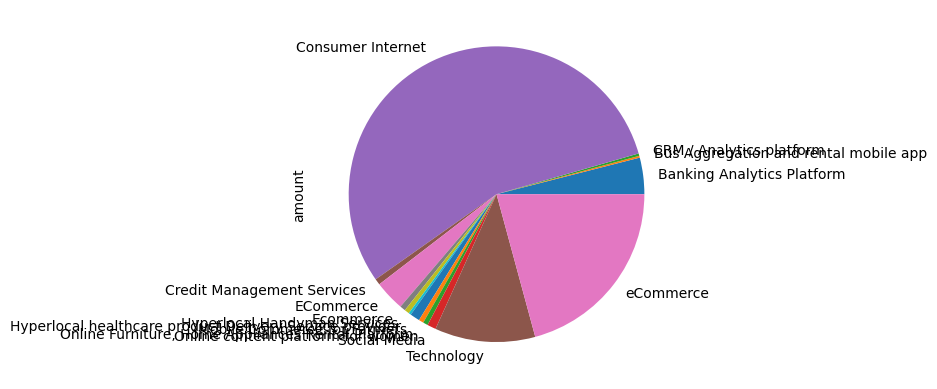

In [30]:
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind = 'pie')

In [31]:
df['year'] = df['date'].dt.year

<Axes: xlabel='year'>

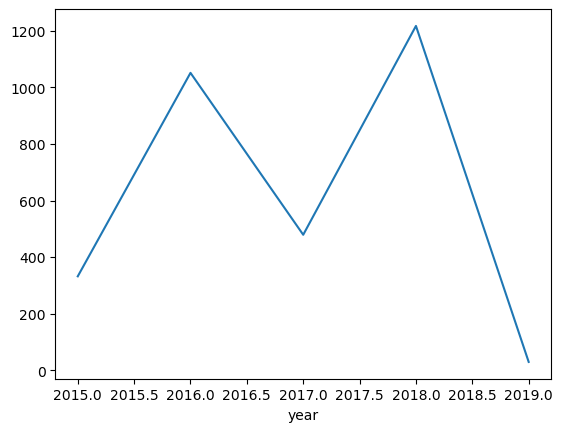

In [32]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()


In [33]:
df.groupby('startup')['amount'].max().sort_values(ascending = False).head(1).values[0]

32175.0

In [34]:
df.groupby('startup')['amount'].sum().mean()

130.12971106967214

In [35]:
df['startup'].nunique()

2318

In [36]:
df['month'] = df['date'].dt.month


In [37]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,36
1,2015,2,14
2,2015,3,37
3,2015,4,66
4,2015,5,54
...,...,...,...
58,2019,12,11
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [38]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [39]:
temp_df['x_axis'] = temp_df['month'].astype('str') + "-" + temp_df['year'].astype('str')

In [40]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5274.637500,1-2015
1,1567.178250,2-2015
2,1913.298750,3-2015
3,4519.308750,4-2015
4,1405.552500,5-2015
...,...,...
58,3715.800000,12-2019
59,140.649250,1-2020
60,39.600000,2-2020
61,1801.460595,9-2020


In [41]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()
temp_df['x_axis'] = temp_df['month'].astype('str') + "-" + temp_df['year'].astype('str')
